## Dish Network Hackathon

#### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, roc_curve

from collections import Counter
from imblearn.over_sampling import SMOTE 

import warnings
warnings.filterwarnings('ignore')

#### Reading and viewing the data and the data dictionary

In [2]:
train_df = pd.read_csv('Train_Dataset.csv')
test_df = pd.read_csv('Test_Dataset.csv')

train_df['data'] = 'train'
test_df['data'] = 'test'

test_ID = test_df['ID']
df = pd.concat([train_df, test_df])
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default,data
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0.0,train
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0.0,train
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0.0,train
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0.0,train
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0.0,train


#### Exploratory Data Analysis

In [3]:
df.duplicated().sum()

0

In [4]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset')

There are 202756 rows and 41 columns in the dataset


##### Descriptive stats of the variables

In [5]:
round(df.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
ID,202756.0,12192657.92,49776.89,12100001.00,12150689.75,12200689.50,12230211.25,12280900.00
Car_Owned,196770.0,0.34,0.47,0.00,0.00,0.00,1.00,1.00
Bike_Owned,196646.0,0.33,0.47,0.00,0.00,0.00,1.00,1.00
Active_Loan,196667.0,0.50,0.50,0.00,0.00,0.00,1.00,1.00
House_Own,196748.0,0.69,0.46,0.00,0.00,1.00,1.00,1.00
Child_Count,196790.0,0.42,0.73,0.00,0.00,0.00,1.00,19.00
Own_House_Age,69080.0,12.10,12.01,0.00,5.00,9.00,15.00,69.00
Mobile_Tag,202756.0,1.00,0.00,0.00,1.00,1.00,1.00,1.00
Homephone_Tag,202756.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00
Workphone_Working,202756.0,0.28,0.45,0.00,0.00,0.00,1.00,1.00


##### Variable Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202756 entries, 0 to 80899
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          202756 non-null  int64  
 1   Client_Income               196715 non-null  object 
 2   Car_Owned                   196770 non-null  float64
 3   Bike_Owned                  196646 non-null  float64
 4   Active_Loan                 196667 non-null  float64
 5   House_Own                   196748 non-null  float64
 6   Child_Count                 196790 non-null  float64
 7   Credit_Amount               196837 non-null  object 
 8   Loan_Annuity                194741 non-null  object 
 9   Accompany_Client            199802 non-null  object 
 10  Client_Income_Type          196554 non-null  object 
 11  Client_Education            196761 non-null  object 
 12  Client_Marital_Status       196840 non-null  object 
 13  Client_Gender  

##### Missing Values

In [7]:
df.isna().sum().sort_values(ascending = False)

Own_House_Age                 133676
Score_Source_1                114328
Social_Circle_Default         103018
Default                        80900
Client_Occupation              69280
Score_Source_3                 44939
Credit_Bureau                  30822
ID_Days                         9849
Score_Source_2                  9401
Population_Region_Relative      8127
Loan_Annuity                    8015
Client_Income_Type              6202
Bike_Owned                      6110
Client_Housing_Type             6095
Active_Loan                     6089
Phone_Change                    6087
Age_Days                        6079
Employed_Days                   6070
Application_Process_Hour        6069
Type_Organization               6068
Client_Income                   6041
Registration_Days               6012
House_Own                       6008
Client_Education                5995
Car_Owned                       5986
Loan_Contract_Type              5972
Child_Count                     5966
C

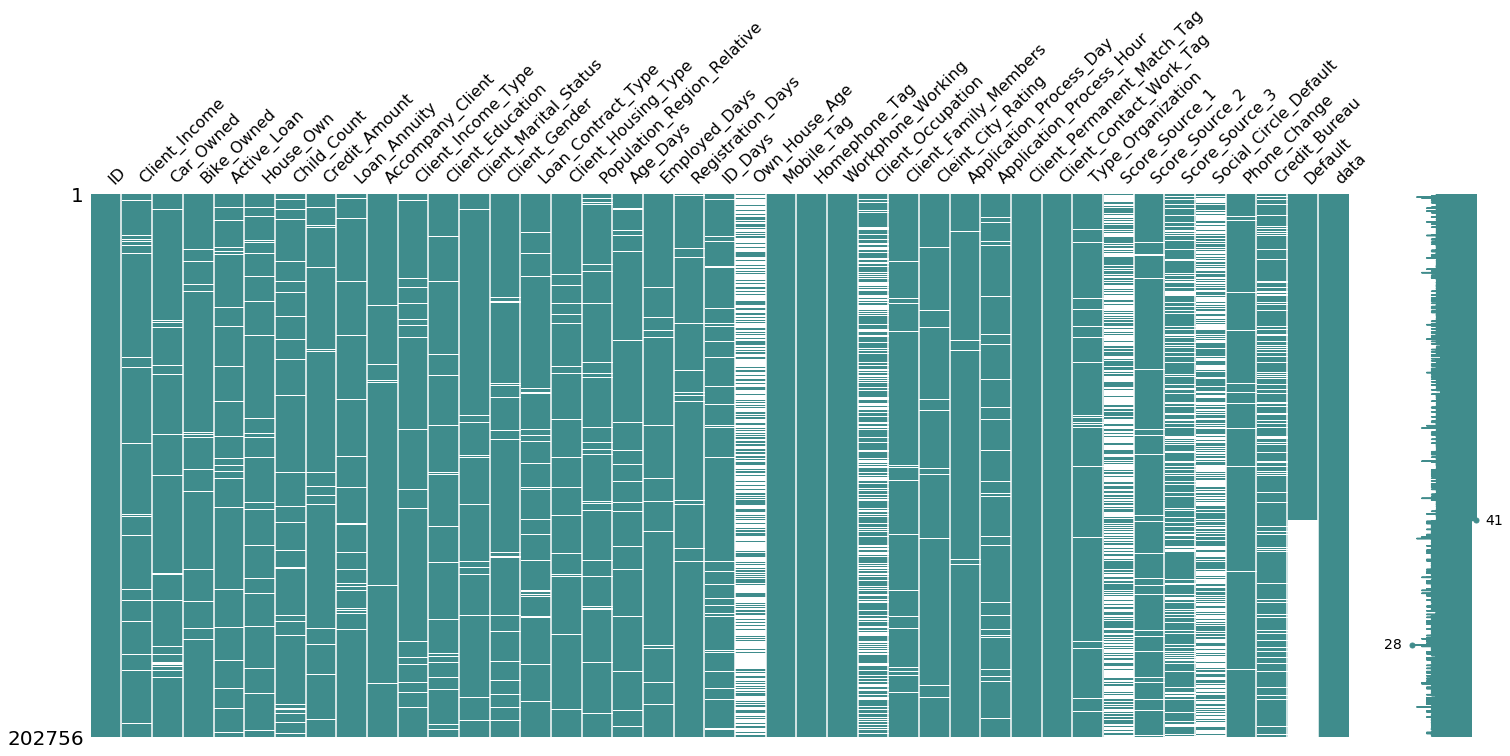

In [8]:
msno.matrix(df, color = (0.25, 0.55, 0.55))

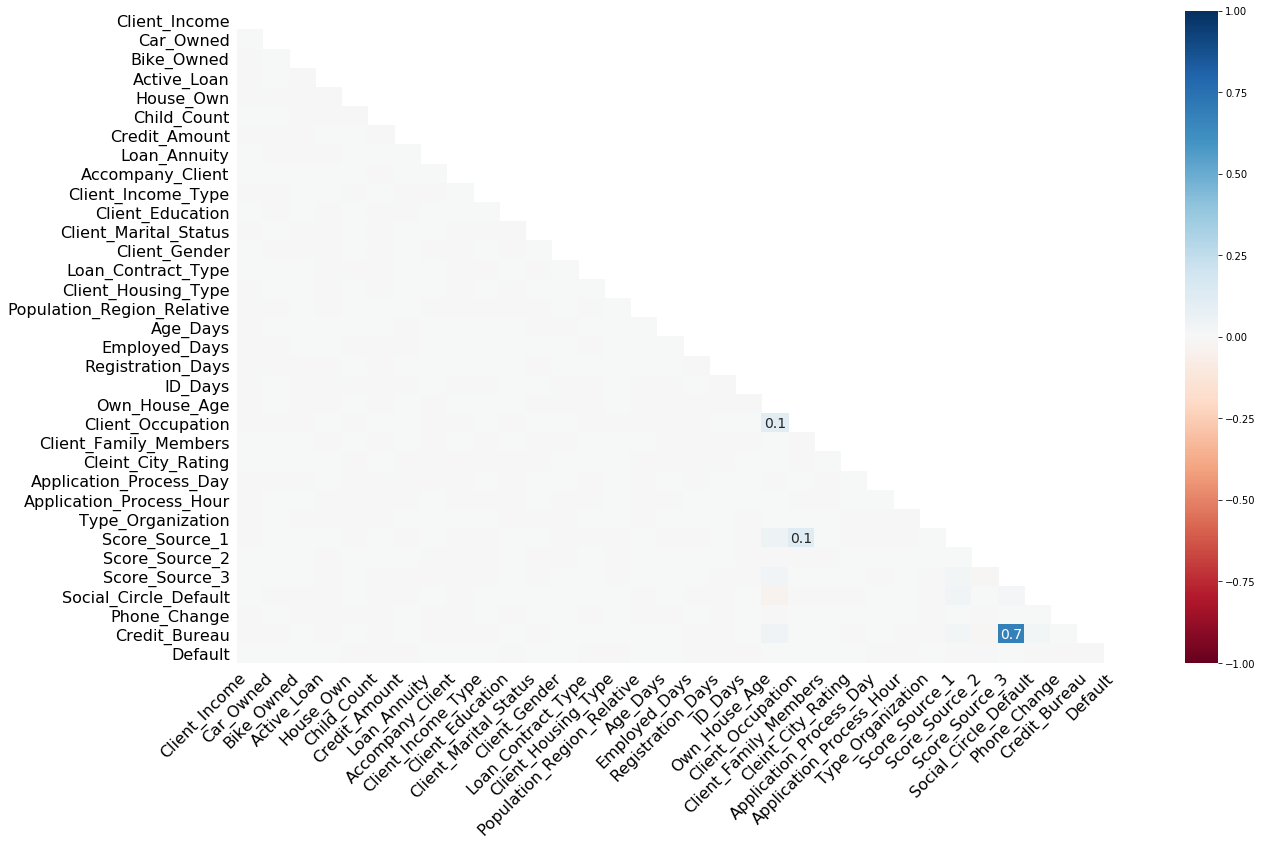

In [9]:
msno.heatmap(df)

##### Percentage of missing values

In [10]:
round(df.isna().sum() / len(df), 4).sort_values(ascending = False)

Own_House_Age                 0.6593
Score_Source_1                0.5639
Social_Circle_Default         0.5081
Default                       0.3990
Client_Occupation             0.3417
Score_Source_3                0.2216
Credit_Bureau                 0.1520
ID_Days                       0.0486
Score_Source_2                0.0464
Population_Region_Relative    0.0401
Loan_Annuity                  0.0395
Client_Income_Type            0.0306
Client_Housing_Type           0.0301
Bike_Owned                    0.0301
Age_Days                      0.0300
Active_Loan                   0.0300
Phone_Change                  0.0300
Type_Organization             0.0299
Employed_Days                 0.0299
Application_Process_Hour      0.0299
Client_Income                 0.0298
Registration_Days             0.0297
House_Own                     0.0296
Client_Education              0.0296
Car_Owned                     0.0295
Loan_Contract_Type            0.0295
Child_Count                   0.0294
C

##### Unique value count

In [11]:
print('Unique values in the dataset:\n')

for i in df.columns:
    print('_' * 50)
    print(i + ':', df[i].nunique(), 'unique values')
    print(df[i].value_counts())

Unique values in the dataset:

__________________________________________________
ID: 180900 unique values
12212566    2
12204265    2
12205324    2
12203277    2
12201230    2
           ..
12236036    1
12225795    1
12223746    1
12229889    1
12101653    1
Name: ID, Length: 180900, dtype: int64
__________________________________________________
Client_Income: 1931 unique values
13500       21145
11250       18239
15750       15468
18000       14443
9000        13198
            ...  
16515.0         1
16560.0         1
10692           1
44370           1
23033.25        1
Name: Client_Income, Length: 1931, dtype: int64
__________________________________________________
Car_Owned: 2 unique values
0.0    129697
1.0     67073
Name: Car_Owned, dtype: int64
__________________________________________________
Bike_Owned: 2 unique values
0.0    131308
1.0     65338
Name: Bike_Owned, dtype: int64
__________________________________________________
Active_Loan: 2 unique values
0.0    98601
1.

Score_Source_2: 97483 unique values
0.285898    417
0.262258    219
0.265256    194
0.159679    180
0.265312    161
           ... 
0.582661      1
0.573878      1
0.426837      1
0.341841      1
0.573231      1
Name: Score_Source_2, Length: 97483, dtype: int64
__________________________________________________
Score_Source_3: 1521 unique values
0.7463002129999999    720
0.7136314             670
0.694092643           642
0.554946769           601
0.670651753           584
                     ... 
0.017016872             1
0.054583994             1
0.823549312             1
0.031404635             1
0.037900574             1
Name: Score_Source_3, Length: 1521, dtype: int64
__________________________________________________
Social_Circle_Default: 2080 unique values
0.0825    4371
0.0619    4251
0.0928    2922
0.0722    2627
0.0082    2319
          ... 
0.2790       1
0.0014       1
0.3519       1
0.1739       1
0.1504       1
Name: Social_Circle_Default, Length: 2080, dtype: int64
___

#### Univariate Analysis

In [12]:
# separating numeric and categorical data

df_num = df.select_dtypes(include = 'number')
df_cat = df.select_dtypes(exclude = 'number')

In [13]:
df_num.shape, df_cat.shape

((202756, 19), (202756, 22))

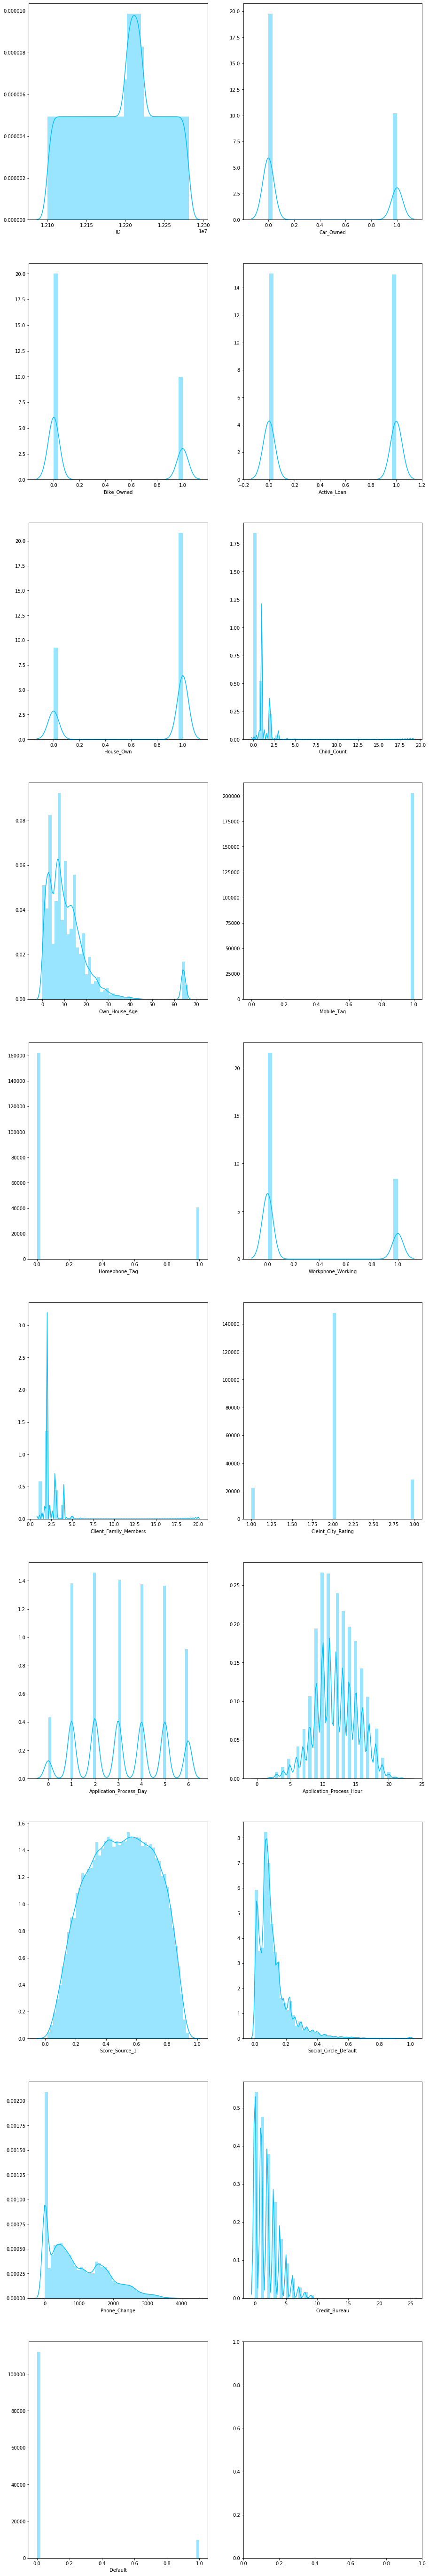

In [14]:
# distibution of numeric data

fig, ax = plt.subplots(figsize = (15, 100), nrows = 10, ncols = 2)

for i, col in enumerate(df_num.columns):
    try:
        sns.distplot(df_num[col], ax = ax[i//2, i%2], color = 'deepskyblue')
    except:
        sns.distplot(df_num[col], ax = ax[i//2, i%2], kde = False, color = 'deepskyblue')

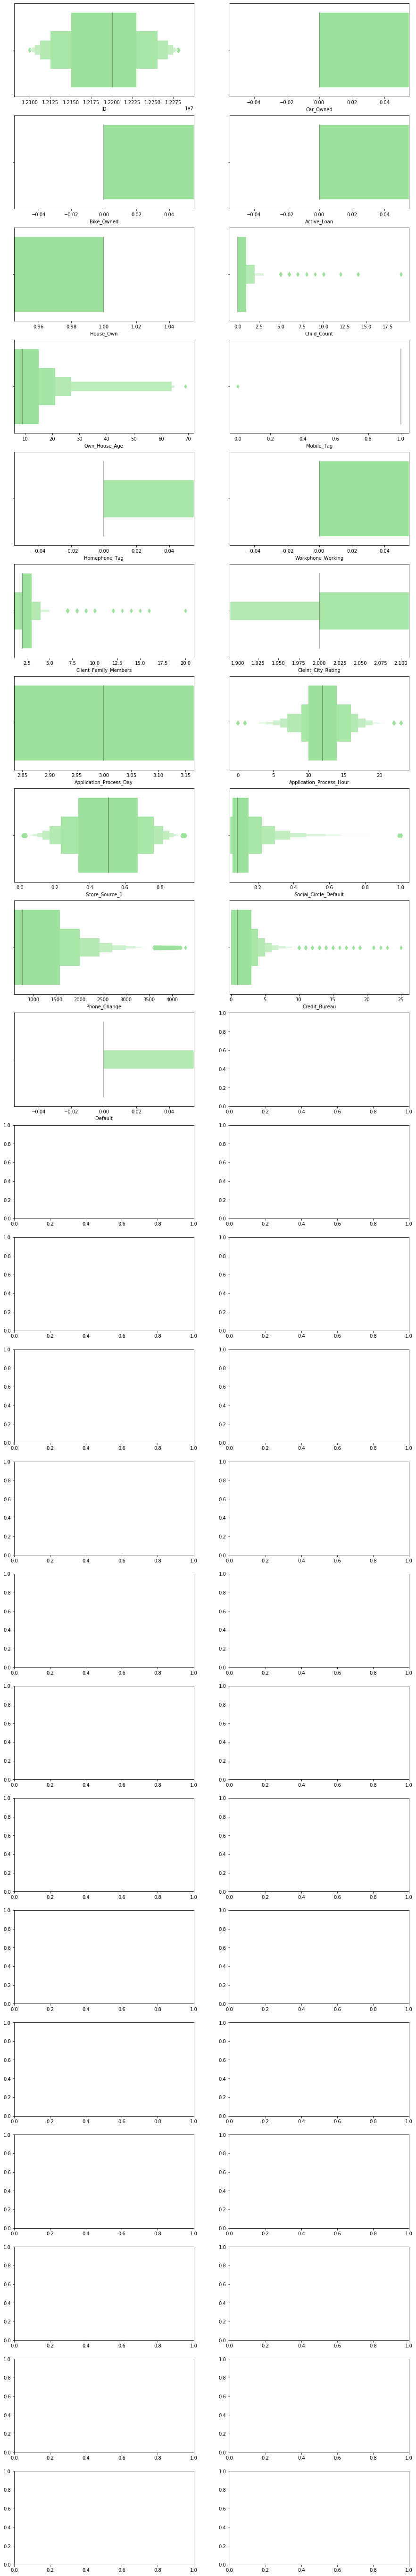

In [15]:
# boxplot of numeric data

fig, ax = plt.subplots(figsize = (15, 100), nrows = 23, ncols = 2)

for i, col in enumerate(df_num.columns):
    sns.boxenplot(df_num[col], ax = ax[i//2, i%2], color = 'lightgreen')

In [16]:
# skewness in the numeric variables

df.skew().sort_values(ascending = False)

Default                       3.076618
Own_House_Age                 2.729577
Social_Circle_Default         2.629308
Child_Count                   2.113753
Homephone_Tag                 1.498286
Credit_Bureau                 1.256487
Client_Family_Members         1.018783
Workphone_Working             0.977261
Phone_Change                  0.717618
Bike_Owned                    0.712232
Car_Owned                     0.671437
Cleint_City_Rating            0.056010
Application_Process_Day       0.010241
Active_Loan                   0.005441
Application_Process_Hour     -0.028871
Score_Source_1               -0.068518
ID                           -0.123484
House_Own                    -0.834499
Mobile_Tag                 -450.284355
dtype: float64

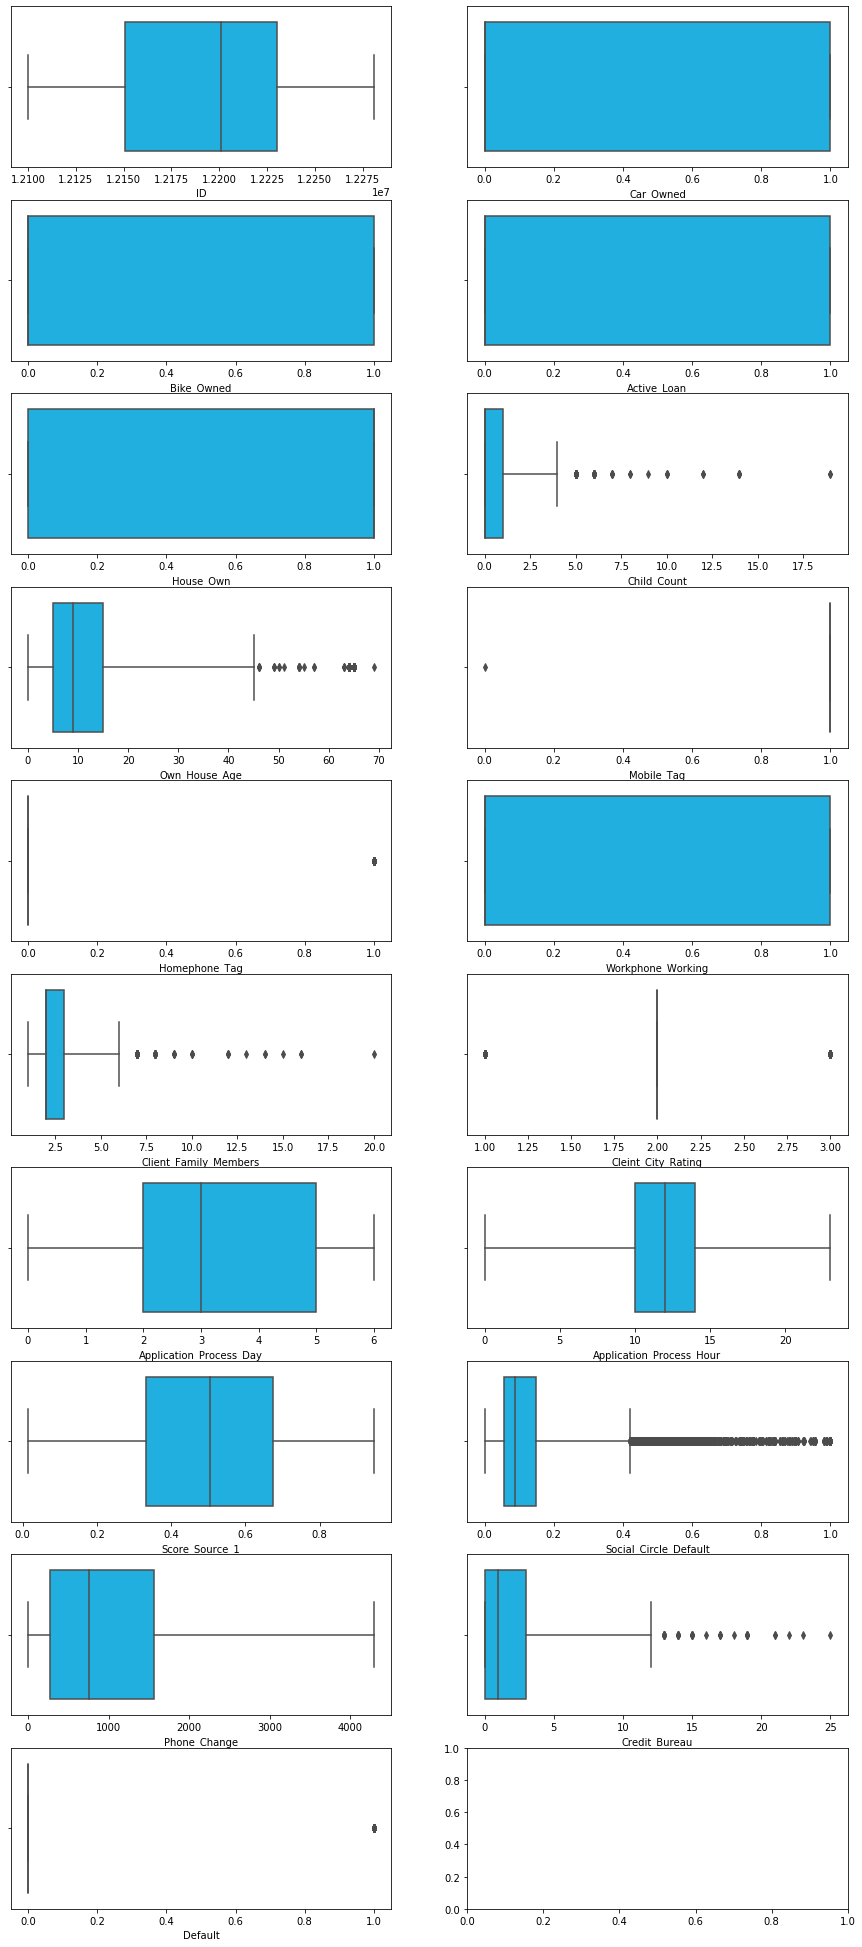

In [17]:
# boxplot of numeric data

fig, ax = plt.subplots(figsize = (15, 35), nrows = 10, ncols = 2)

for i, col in enumerate(df_num.columns):
    sns.boxplot(df_num[col], ax = ax[i//2, i%2], whis = 3, color = 'deepskyblue')

In [18]:
# outlier analysis - statistical

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
upper_range = q3 + (IQR*1.5)
lower_range = q1 - (IQR*1.5)
extreme_upper_range = q3 + (IQR*3)
extreme_lower_range = q1 - (IQR*3)

In [19]:
pd.DataFrame(((df_num < extreme_lower_range) | (df_num > extreme_upper_range)).sum(), 
             columns = ['No. of Outliers']).sort_values(by = 'No. of Outliers', ascending = False)

,No. of Outliers
Cleint_City_Rating,50533
Homephone_Tag,40596
Default,9845
Own_House_Age,2257
Social_Circle_Default,2184
Child_Count,89
Client_Family_Members,83
Credit_Bureau,39
Mobile_Tag,1
Application_Process_Hour,0


In [20]:
pd.DataFrame(((df_num < extreme_lower_range) | (df_num > extreme_upper_range)).sum(), 
             columns = ['No. of Outliers']).sort_values(by = 'No. of Outliers', ascending = False) / len(df)

,No. of Outliers
Cleint_City_Rating,0.249231
Homephone_Tag,0.200221
Default,0.048556
Own_House_Age,0.011132
Social_Circle_Default,0.010772
Child_Count,0.000439
Client_Family_Members,0.000409
Credit_Bureau,0.000192
Mobile_Tag,0.000005
Application_Process_Hour,0.000000


In [21]:
# # distibution of categorical data - top 20

# fig, ax = plt.subplots(figsize = (20, 100), nrows = 11, ncols = 2)

# for i, col in enumerate(df_cat.columns):
#     sns.countplot(y = df_cat[col], ax = ax[i//2, i%2], order = df_cat[col].value_counts().index)
#     plt.tight_layout(pad = 3.0)
    
# plt.show()

In [22]:
# # distibution of categorical data - bottom 20

# fig, ax = plt.subplots(figsize = (20, 8), nrows = 1, ncols = 3)

# for i, col in enumerate(df_cat.columns[4:]):
#     sns.countplot(df_cat[col], ax = ax[i], order = df_cat[col].value_counts().index)
#     plt.tight_layout(pad = 3.0)

# plt.show()

#### Bivariate Analysis

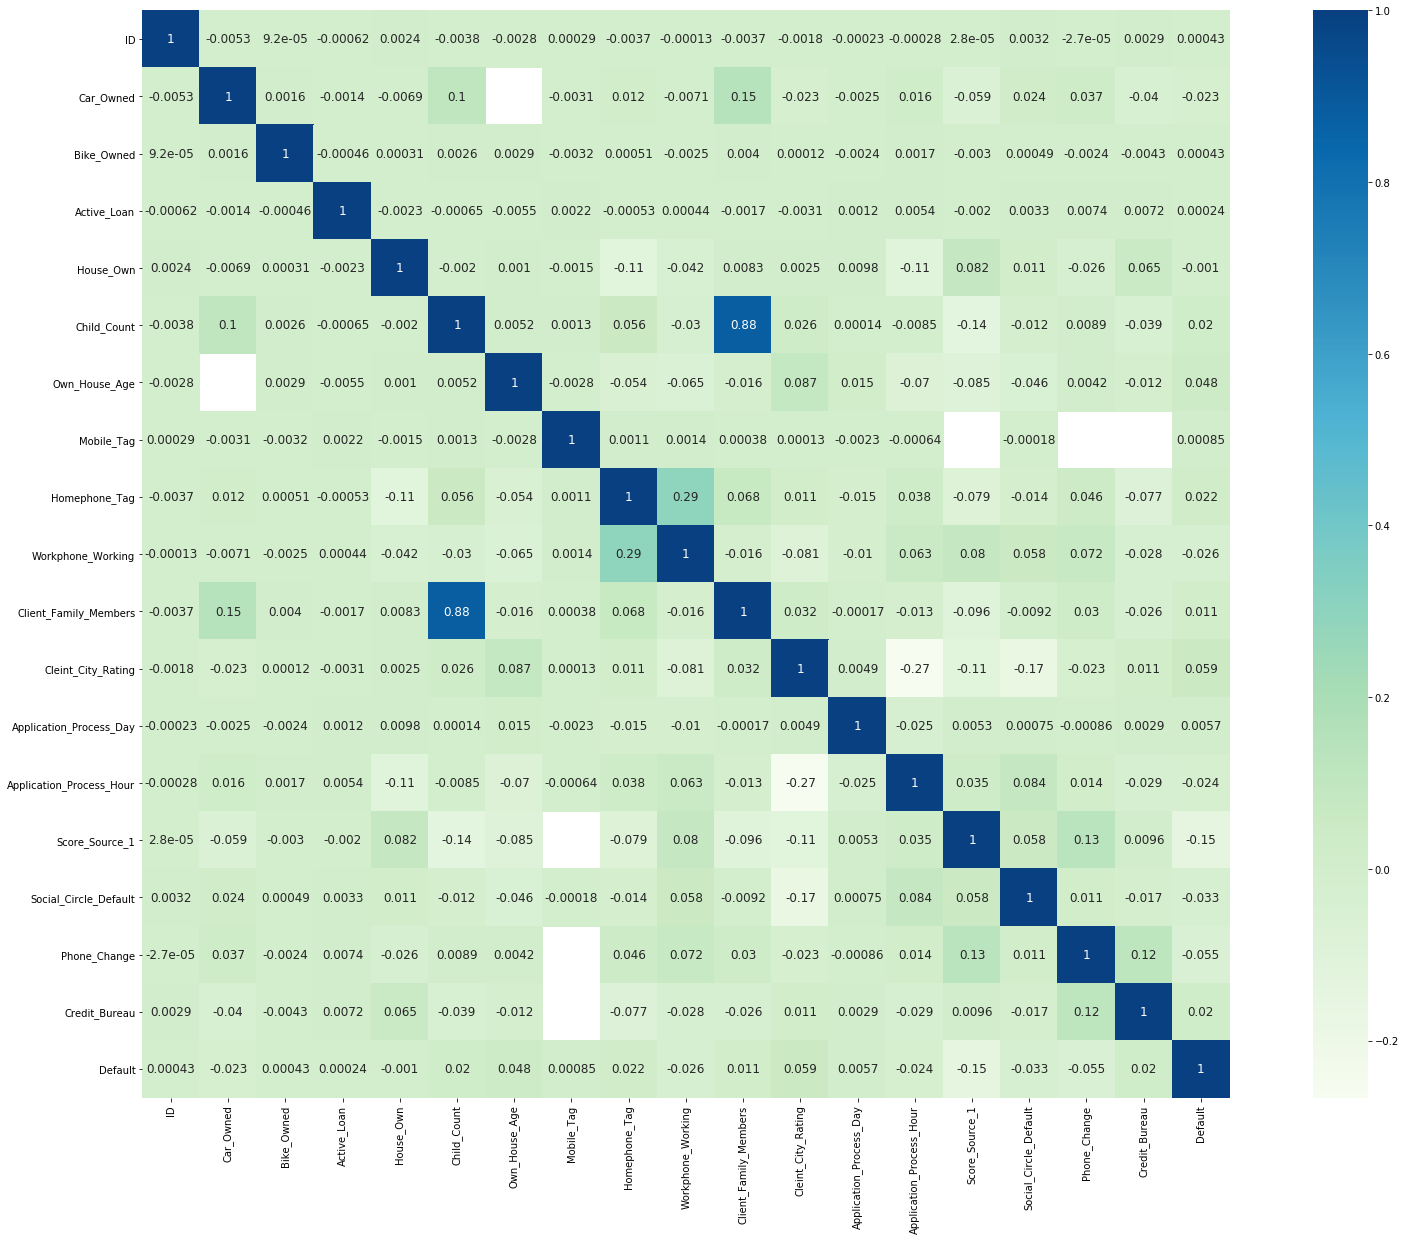

In [23]:
# correlation heatmap

plt.figure(figsize = (30, 20))

sns.heatmap(df.corr(), square = True, annot = True, annot_kws = {'size': 12}, cmap = 'GnBu')

In [24]:
# absolute correlation with target variable

abs(df.corr()['Default']).sort_values(ascending = False)

Default                     1.000000
Score_Source_1              0.146809
Cleint_City_Rating          0.058857
Phone_Change                0.054591
Own_House_Age               0.047513
Social_Circle_Default       0.032631
Workphone_Working           0.025682
Application_Process_Hour    0.023589
Car_Owned                   0.023221
Homephone_Tag               0.021593
Credit_Bureau               0.020001
Child_Count                 0.019687
Client_Family_Members       0.011110
Application_Process_Day     0.005693
House_Own                   0.001011
Mobile_Tag                  0.000849
ID                          0.000432
Bike_Owned                  0.000431
Active_Loan                 0.000240
Name: Default, dtype: float64

#### Removal of unwanted variables

In [25]:
df.drop(['ID', 'Mobile_Tag'], axis = 1, inplace = True)

#### Outlier treatment

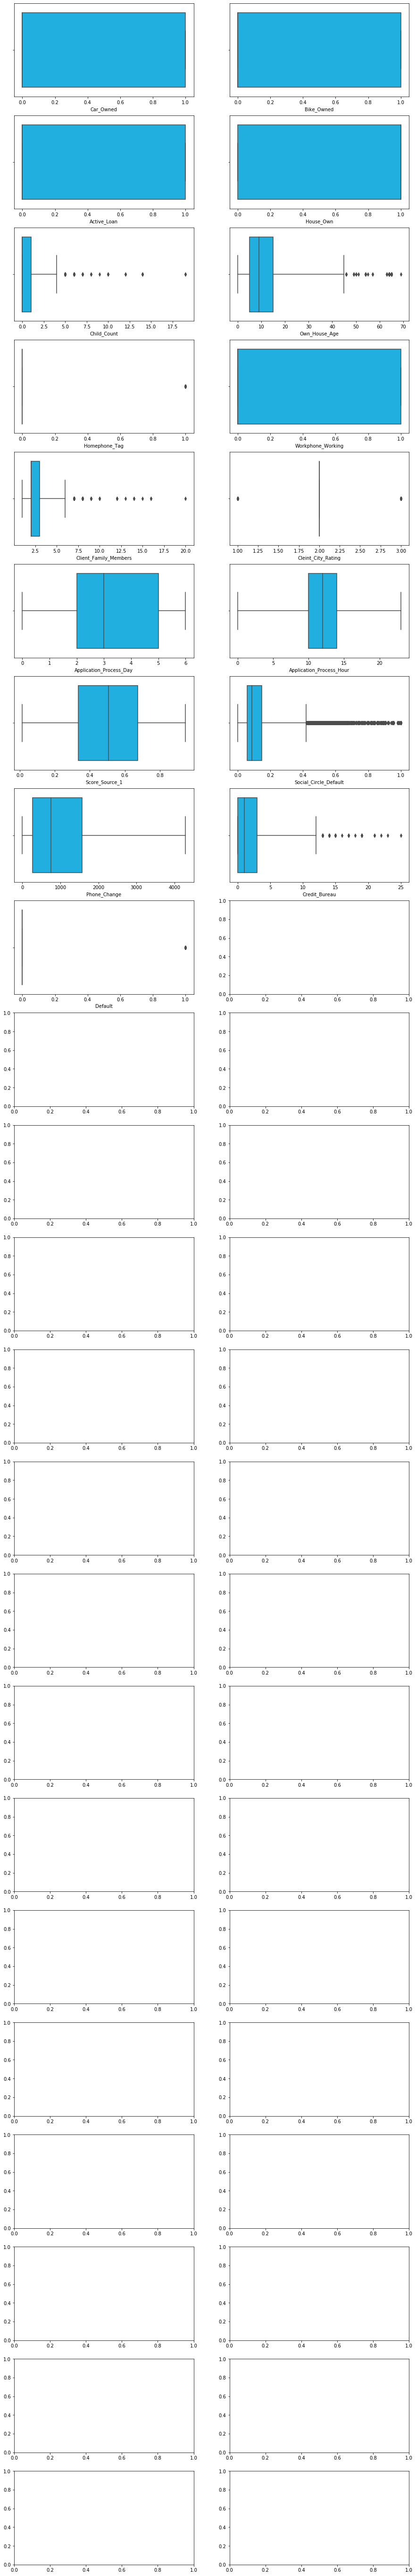

In [26]:
# boxplot of numeric data
df_num = df.select_dtypes(include = 'number')
df_cat = df.select_dtypes(exclude = 'number')

fig, ax = plt.subplots(figsize = (15, 100), nrows = 23, ncols = 2)

for i, col in enumerate(df_num.columns):
    sns.boxplot(df_num[col], ax = ax[i//2, i%2], whis = 3, color = 'deepskyblue')

In [27]:
# df['Child_Count'] = np.where(df['Child_Count'] > extreme_upper_range['Child_Count'], extreme_upper_range['Child_Count'], df['Child_Count'])
# df['Client_Family_Members'] = np.where(df['Client_Family_Members'] > extreme_upper_range['Client_Family_Members'], extreme_upper_range['Client_Family_Members'], df['Client_Family_Members'])
# df['Credit_Bureau'] = np.where(df['Credit_Bureau'] > extreme_upper_range['Credit_Bureau'], extreme_upper_range['Credit_Bureau'], df['Credit_Bureau'])

In [28]:
# df['Child_Count'] = np.where(df['Child_Count'] > extreme_upper_range['Child_Count'], df['Child_Count'].median(), df['Child_Count'])
# df['Client_Family_Members'] = np.where(df['Client_Family_Members'] > extreme_upper_range['Client_Family_Members'], df['Client_Family_Members'].median(), df['Client_Family_Members'])
# df['Credit_Bureau'] = np.where(df['Credit_Bureau'] > extreme_upper_range['Credit_Bureau'], df['Credit_Bureau'].median(), df['Credit_Bureau'])

In [29]:
pd.DataFrame(((df_num < extreme_lower_range) | (df_num > extreme_upper_range)).sum(), 
             columns = ['No. of Outliers']).sort_values(by = 'No. of Outliers', ascending = False)

,No. of Outliers
Cleint_City_Rating,50533
Homephone_Tag,40596
Default,9845
Own_House_Age,2257
Social_Circle_Default,2184
Child_Count,89
Client_Family_Members,83
Credit_Bureau,39
ID,0
Score_Source_1,0


In [30]:
df[['Score_Source_1', 'Score_Source_2', 'Score_Source_3']]

,Score_Source_1,Score_Source_2,Score_Source_3
0,0.568066,0.478787,NaN
1,0.563360,0.215068,NaN
2,NaN,0.552795,0.329655
3,NaN,0.135182,0.631355
4,0.508199,0.301182,0.355639
...,...,...,...
80895,0.495015,0.599436,0.276440695
80896,0.803057,NaN,0.680138822
80897,NaN,0.403059,0.215182404
80898,NaN,0.236402,0.579727423


#### Missing Value treatment

In [31]:
(df.isna().sum()).nlargest(40)

Own_House_Age                 133676
Score_Source_1                114328
Social_Circle_Default         103018
Default                        80900
Client_Occupation              69280
Score_Source_3                 44939
Credit_Bureau                  30822
ID_Days                         9849
Score_Source_2                  9401
Population_Region_Relative      8127
Loan_Annuity                    8015
Client_Income_Type              6202
Bike_Owned                      6110
Client_Housing_Type             6095
Active_Loan                     6089
Phone_Change                    6087
Age_Days                        6079
Employed_Days                   6070
Application_Process_Hour        6069
Type_Organization               6068
Client_Income                   6041
Registration_Days               6012
House_Own                       6008
Client_Education                5995
Car_Owned                       5986
Loan_Contract_Type              5972
Child_Count                     5966
C

In [32]:
df['Client_Income_Type'].value_counts()

Service            101501
Commercial          46001
Retired             35242
Govt Job            13784
Student                11
Unemployed             10
Businessman             3
Maternity leave         2
Name: Client_Income_Type, dtype: int64

In [33]:
df['Client_Income'].replace('$', np.nan, inplace = True)
df['Credit_Amount'].replace('$', np.nan, inplace = True)
df['Loan_Annuity'].replace('$', np.nan, inplace = True)
df['Loan_Annuity'].replace('#VALUE!', np.nan, inplace = True)
df['Accompany_Client'].replace('##', np.nan, inplace = True)
df['Population_Region_Relative'].replace(['#', '@'], np.nan, inplace = True)

df['Age_Days'].replace('x', np.nan, inplace = True)
df['Employed_Days'].replace('x', np.nan, inplace = True)
df['Registration_Days'].replace('x', np.nan, inplace = True)
df['ID_Days'].replace('x', np.nan, inplace = True)

df['Score_Source_2'].replace(['#'], np.nan, inplace = True)
df['Score_Source_3'].replace(['#', '&'], np.nan, inplace = True)

df['Client_Marital_Status'].replace('Unknown', 'M', inplace = True)
df['Client_Gender'].replace('XNA', 'Male', inplace = True)
df['Client_Income_Type'].replace(['Student', 'Unemployed', 'Businessman', 'Maternity leave'], 'Others', inplace = True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202756 entries, 0 to 80899
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               196683 non-null  object 
 1   Car_Owned                   196770 non-null  float64
 2   Bike_Owned                  196646 non-null  float64
 3   Active_Loan                 196667 non-null  float64
 4   House_Own                   196748 non-null  float64
 5   Child_Count                 196790 non-null  float64
 6   Credit_Amount               196828 non-null  object 
 7   Loan_Annuity                194722 non-null  object 
 8   Accompany_Client            199786 non-null  object 
 9   Client_Income_Type          196554 non-null  object 
 10  Client_Education            196761 non-null  object 
 11  Client_Marital_Status       196840 non-null  object 
 12  Client_Gender               198716 non-null  object 
 13  Loan_Contract_T

In [35]:
df['Client_Marital_Status'].value_counts()

M    144955
S     29141
D     12597
W     10147
Name: Client_Marital_Status, dtype: int64

In [36]:
median = ['Credit_Amount', 'Own_House_Age', 'Score_Source_1', 'Score_Source_3', 'Score_Source_2']
median_round = ['ID_Days', 'Age_Days', 'Employed_Days'] #, 'Loan_Annuity'] 
mode = ['Social_Circle_Default', 'Client_Income', 'Client_Occupation', 'Credit_Bureau', 'Population_Region_Relative', 'Bike_Owned', 
        'Client_Housing_Type', 'Active_Loan', 'Phone_Change', 'Application_Process_Hour', 'Type_Organization', 
        'Registration_Days', 'House_Own', 'Client_Income_Type', 'Client_Education', 'Car_Owned', 'Loan_Contract_Type', 'Child_Count', 
        'Client_Marital_Status', 'Client_Family_Members', 'Client_Gender', 'Cleint_City_Rating', 'Application_Process_Day',
        'Accompany_Client']

In [37]:
df['Client_Income_Type'].value_counts()

Service       101501
Commercial     46001
Retired        35242
Govt Job       13784
Others            26
Name: Client_Income_Type, dtype: int64

In [38]:
df.isna().sum()

Client_Income                   6073
Car_Owned                       5986
Bike_Owned                      6110
Active_Loan                     6089
House_Own                       6008
Child_Count                     5966
Credit_Amount                   5928
Loan_Annuity                    8034
Accompany_Client                2970
Client_Income_Type              6202
Client_Education                5995
Client_Marital_Status           5916
Client_Gender                   4040
Loan_Contract_Type              5972
Client_Housing_Type             6095
Population_Region_Relative      8146
Age_Days                        6101
Employed_Days                   6092
Registration_Days               6034
ID_Days                         9871
Own_House_Age                 133676
Homephone_Tag                      0
Workphone_Working                  0
Client_Occupation              69280
Client_Family_Members           4054
Cleint_City_Rating              4040
Application_Process_Day         3967
A

In [39]:
# for col in mean:
#     try:
#         df[col].fillna(df[col].mean(), inplace = True)
#     except:
#         df[col].fillna(df[col].mode()[0], inplace = True)

In [40]:
for col in median:
    try:
        df[col].fillna(df[col].median(), inplace = True)
    except:
        print(df[col])

In [41]:
for col in median_round:
    try:
        df[col].fillna(int(df[col].median()), inplace = True)
    except:
        print(df[col])

In [42]:
for col in mode:
    try:
        df[col].fillna(df[col].mode()[0], inplace = True)
    except:
        print(df[col])

In [43]:
df['Credit_Amount'] = df['Credit_Amount'].astype('float64')
df['Client_Income'] = df['Client_Income'].astype('float64')
df['Age_Days'] = df['Age_Days'].astype('int64')
df['Employed_Days'] = df['Employed_Days'].astype('int64')
df['Registration_Days'] = df['Registration_Days'].astype('int64')
df['ID_Days'] = df['ID_Days'].astype('int64')
df['Loan_Annuity'] = df['Loan_Annuity'].astype('float64')
df['Population_Region_Relative'] = df['Population_Region_Relative'].astype('float64')
df['Score_Source_2'] = df['Score_Source_2'].astype('float64')
df['Score_Source_3'] = df['Score_Source_3'].astype('float64')

In [44]:
# df['Population_Region_Relative'] = np.where(df['Population_Region_Relative'] == 100, df['Population_Region_Relative'].mode()[0], df['Population_Region_Relative'])

In [45]:
round((df['Loan_Annuity'] / df['Credit_Amount']).mean(), 2)

0.05

In [46]:
df['Loan_Annuity'] = np.where(df['Loan_Annuity'].isna() == True, df['Credit_Amount'] * 0.05, df['Loan_Annuity'])

In [47]:
# df['Employed_Days'] = np.where(df['Employed_Days'] > 35000, df['Employed_Days'].mode()[0], df['Employed_Days'])

In [48]:
abs(df.corr()['Default']).sort_values(ascending = False)

Default                       1.000000
Score_Source_3                0.151700
Score_Source_1                0.092532
Age_Days                      0.072963
Cleint_City_Rating            0.058255
Phone_Change                  0.053544
ID_Days                       0.052707
Employed_Days                 0.043828
Score_Source_2                0.037262
Registration_Days             0.036001
Credit_Amount                 0.030467
Social_Circle_Default         0.029900
Workphone_Working             0.025682
Application_Process_Hour      0.023438
Car_Owned                     0.022572
Homephone_Tag                 0.021593
Client_Income                 0.021075
Own_House_Age                 0.021024
Child_Count                   0.019277
Loan_Annuity                  0.013141
Client_Family_Members         0.010984
Credit_Bureau                 0.006710
Application_Process_Day       0.005473
Population_Region_Relative    0.002312
House_Own                     0.000619
Bike_Owned               

#### Feature Engineering

In [49]:
df['Age_Years'] = round(df['Age_Days'] / 365)
df['Employed_Years'] = round(df['Employed_Days'] / 365)
df['Registration_Years'] = round(df['Registration_Days'] / 365)
df['ID_Years'] = round(df['ID_Days'] / 365)

df['Age_Months'] = round(df['Age_Days'] / 12)
df['Employed_Months'] = round(df['Employed_Days'] / 12)
df['Registration_Months'] = round(df['Registration_Days'] / 12)
df['ID_Months'] = round(df['ID_Days'] / 12)

df['Age_Weeks'] = round(df['Age_Days'] / 7)
df['Employed_Weeks'] = round(df['Employed_Days'] / 7)
df['Registration_Weeks'] = round(df['Registration_Days'] / 7)
df['ID_Weeks'] = round(df['ID_Days'] / 7)

In [50]:
# df['Phone_Change_Weeks'] = round(df['Phone_Change'] / 7)

In [51]:
# df['Type_Organization_Code'] = df['Type_Organization'].str.extract('(\d+)')
# df['Type_Organization_Code'].fillna(0, inplace = True)
# df['Type_Organization_Code'] = df['Type_Organization_Code'].astype('int64')

# df['Type_Organization'].replace(['Self-employed', 'Government', 'XNA', 'Business Entity Type 3',
#        'Other', 'Industry: type 3', 'Business Entity Type 2',
#        'Business Entity Type 1', 'Transport: type 4', 'Construction',
#        'Kindergarten', 'Trade: type 3', 'Industry: type 2',
#        'Trade: type 7', 'Trade: type 2', 'Agriculture', 'Military',
#        'Medicine', 'Housing', 'Industry: type 1', 'Industry: type 11',
#        'Bank', 'School', 'Industry: type 9', 'Postal', 'University',
#        'Transport: type 2', 'Restaurant', 'Electricity', 'Police',
#        'Industry: type 4', 'Security Ministries', 'Services',
#        'Transport: type 3', 'Mobile', 'Hotel', 'Security',
#        'Industry: type 7', 'Advertising', 'Cleaning', 'Realtor',
#        'Trade: type 6', 'Culture', 'Industry: type 5', 'Telecom',
#        'Trade: type 1', 'Industry: type 12', 'Industry: type 8',
#        'Insurance', 'Emergency', 'Legal Services', 'Industry: type 10',
#        'Trade: type 4', 'Industry: type 6', 'Transport: type 1',
#        'Industry: type 13', 'Religion', 'Trade: type 5'],

                               
#         ['Self-employed', 'Government', 'XNA', 'Business Entity',
#        'Other', 'Industry', 'Business Entity',
#        'Business Entity', 'Transport', 'Construction',
#        'Kindergarten', 'Trade', 'Industry',
#        'Trade', 'Trade', 'Agriculture', 'Military',
#        'Medicine', 'Housing', 'Industry', 'Industry',
#        'Bank', 'School', 'Industry', 'Postal', 'University',
#        'Transport', 'Restaurant', 'Electricity', 'Police',
#        'Industry', 'Security Ministries', 'Services',
#        'Transport', 'Mobile', 'Hotel', 'Security',
#        'Industry', 'Advertising', 'Cleaning', 'Realtor',
#        'Trade', 'Culture', 'Industry', 'Telecom',
#        'Trade', 'Industry', 'Industry',
#        'Insurance', 'Emergency', 'Legal Services', 'Industry',
#        'Trade', 'Industry', 'Transport',
#        'Industry', 'Religion', 'Trade'], inplace = True)

In [52]:
df.columns

Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Own_House_Age', 'Homephone_Tag',
       'Workphone_Working', 'Client_Occupation', 'Client_Family_Members',
       'Cleint_City_Rating', 'Application_Process_Day',
       'Application_Process_Hour', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_1',
       'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default',
       'Phone_Change', 'Credit_Bureau', 'Default', 'data', 'Age_Years',
       'Employed_Years', 'Registration_Years', 'ID_Years', 'Age_Months',
       'Employed_Months', 'Registration_Months', 'ID_Months', 'Age_Weeks',
       '

In [53]:
df['Default'].value_counts(normalize = True)

0.0    0.919208
1.0    0.080792
Name: Default, dtype: float64

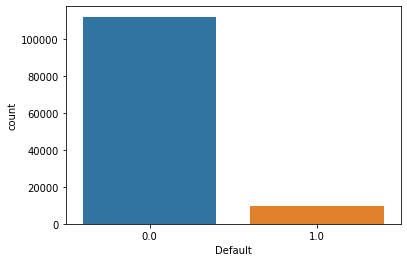

In [54]:
sns.countplot(df['Default'])

In [55]:
pd.DataFrame(((df_num < extreme_lower_range) | (df_num > extreme_upper_range)).sum(), 
             columns = ['No. of Outliers']).sort_values(by = 'No. of Outliers', ascending = False)

,No. of Outliers
Cleint_City_Rating,50533
Homephone_Tag,40596
Default,9845
Own_House_Age,2257
Social_Circle_Default,2184
Child_Count,89
Client_Family_Members,83
Credit_Bureau,39
ID,0
Score_Source_1,0


In [56]:
# sns.boxplot(df['Client_Income'], whis = 3, color = 'deepskyblue')

In [57]:
# df[df['Client_Income'] > 500000]

In [58]:
# df['Client_Income'] = np.where(df['Client_Income'] > 500000, df['Client_Income'].median(), df['Client_Income'])

In [59]:
# sns.boxplot(df['Employed_Days'], whis = 3, color = 'deepskyblue')

In [60]:
# sns.boxplot(df['Score_Source_2'], whis = 3, color = 'deepskyblue')

In [61]:
# df['Score_Source_2'] = np.where(df['Score_Source_2'] == 100, df['Score_Source_2'].mode()[0], df['Score_Source_2'])

In [62]:
df['LoanAnn-to-Income'] = df['Loan_Annuity'] / df['Client_Income']
df['Total_Score_Source'] = df['Score_Source_2'] + df['Score_Source_3'] + df['Score_Source_1'] 
# df['Total_Score_STD'] = df['Total_Score_Source'] - (df['Total_Score_Source'].std())
# df['Total_Score_STD'] = df['Total_Score_Source'] - (df['Total_Score_Source'].mean())
# df['Avg_Score_Source'] = (df['Score_Source_2'] + df['Score_Source_3'] + df['Score_Source_1'])/3

In [63]:
abs(df.corr()['Default']).sort_values(ascending = False)

Default                       1.000000
Score_Source_3                0.151700
Score_Source_1                0.092532
Total_Score_Source            0.085859
Age_Years                     0.072971
Age_Months                    0.072966
Age_Days                      0.072963
Age_Weeks                     0.072962
Cleint_City_Rating            0.058255
Phone_Change                  0.053544
ID_Months                     0.052719
ID_Weeks                      0.052708
ID_Days                       0.052707
ID_Years                      0.052430
Employed_Years                0.043829
Employed_Months               0.043828
Employed_Weeks                0.043828
Employed_Days                 0.043828
Score_Source_2                0.037262
Registration_Months           0.036003
Registration_Days             0.036001
Registration_Weeks            0.035999
Registration_Years            0.035854
Credit_Amount                 0.030467
Social_Circle_Default         0.029900
Workphone_Working        

#### Variable transformation

In [64]:
# converting categorical columns to numeric

df_cat_new = df.select_dtypes(include = 'object')

for feature in df_cat_new.columns:
    df[feature] = pd.Categorical(df[feature]).codes

In [65]:
df['data'].value_counts()

1    121856
0     80900
Name: data, dtype: int64

In [66]:
train_df = df[df['data'] == 1]
test_df = df[df['data'] == 0]

#### Train Test Split

In [67]:
X = train_df.drop(['Default', 'data', 'Loan_Contract_Type', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days',
                  'Active_Loan', 'Bike_Owned', 'House_Own',
                  'Client_Housing_Type', 'Own_House_Age',
                  'Homephone_Tag'], axis = 1)
y = train_df['Default']

test = test_df.drop(['Default', 'data', 'Loan_Contract_Type','Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days',
                  'Active_Loan', 'Bike_Owned', 'House_Own',
                  'Client_Housing_Type', 'Own_House_Age', 
                  'Homephone_Tag'], axis = 1) 

#### SMOTE

In [68]:
counter = Counter(y)
counter

Counter({0.0: 112011, 1.0: 9845})

In [69]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 9, stratify = y)

#### Modeling

In [72]:
xt_cv_model = cross_val_score(ExtraTreesClassifier(n_estimators = 280, 
                                                   max_depth = None,
                                                   min_samples_split = 10, 
                                                   max_features = 0.95, 
                                                   random_state = 98,
                                                   n_jobs = -1), 
                                X, y, groups = None, scoring = 'f1', 
                                cv = 5, n_jobs = -1, verbose = 0)

print(xt_cv_model.mean()) 

0.944404974885235


In [75]:
xt_model = ExtraTreesClassifier(n_estimators = 280, 
                                max_depth = None,
                                min_samples_split = 10, 
                                max_features = 0.95, 
                                random_state = 98,
                                n_jobs = -1)
xt_model.fit(X, y)

ExtraTreesClassifier(max_features=0.95, min_samples_split=10, n_estimators=280,
                     n_jobs=-1, random_state=98)

In [76]:
pd.DataFrame(xt_model.feature_importances_, index = X.columns, columns = ['Feature Imp']).sort_values('Feature Imp', ascending = False)

,Feature Imp
Car_Owned,0.149748
Client_Gender,0.089336
Score_Source_3,0.070070
Cleint_City_Rating,0.060364
Workphone_Working,0.056449
Accompany_Client,0.035609
Client_Education,0.035473
Total_Score_Source,0.033501
Score_Source_2,0.032259
Application_Process_Day,0.028032


#### Submission

In [77]:
final_pred = xt_model.predict(test)

submission = pd.DataFrame(final_pred, index = test_ID, columns = ['Default'])
submission.to_csv('submission.csv')